In [1]:
%pylab
%matplotlib inline
import mesa_reader as mr
from scipy import constants
import numpy as np
from astropy import constants as const
from scipy.stats import *
import math

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [164]:
x = array([20.94,19.27, 17.58, 11.64, 9.97,8.31, 1.73, 0])
#x = x[::-1]

count_rate_background = log(array([2.21192053, 2.327906977, 2.763085399, 4.726840855, 5.857142857, 6.566666667, 13.51428571,13.67]))

count_rate = log(array([1.76, 1.88, 2.31, 4.28, 5.41, 6.12, 12.45, 13.22]))

#x = array([22.81, 21.16, 19.07, 12.52, 10.68 ,8.95,2.13,0])
#x = x[::-1]

#count_rate_err_background = array([0.07, 0.07, 0.09, 0.11, 0.12, 0.13, 0.18, 0.18])

count_rate_err = array([0.070, 0.074, 0.087, 0.106, 0.118, 0.125, 0.175, 0.180])

#count_rate_err = array([0.005, 0.005, 0.008, 0.011, 0.014, 0.016, 0.031, 0.033])

#count_rate_err = array([0.032, 0.032, 0.032, 0.022, 0.02, 0.019, 0.014, 0.013])

#print count_rate_err_background 


0.101636640301
2.64767873441
0.00249780684962


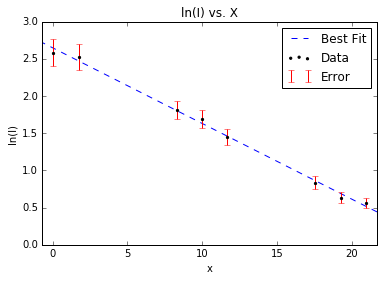

In [169]:
xmin=21.7
xmax=-.7
xlims = np.linspace(xmin,xmax,8)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,count_rate)
slope = -slope
print slope
print intercept
print std_err

#I = .8 * e**(slope * x)

#ln_I = intercept + (slope * x)


ln_I = (-slope * xlims) + intercept
plt.xlim(-.7,21.7)

plt.plot(xlims,ln_I,'--', label = "Best Fit",color = "b", zorder=1)

plt.scatter(x,count_rate, marker='.',color = "black", edgecolors ="black", linewidth = 1,label = "Data",zorder = 3)

plt.errorbar(x, count_rate, yerr = count_rate_err, ecolor = "r", fmt='none', label = "Error", zorder=2)

plt.xlabel('x')

plt.ylabel('ln(I)')

plt.title("ln(I) vs. X")

plt.legend()#loc='upper left'

plt.savefig("ln(I)_vs._x.pdf")

In [177]:
def chisqg(count_rate,ln_I,count_rate_err):  
    chisq=np.sum( ((count_rate-ln_I)/count_rate_err)**2 )  
    return chisq

print chisqg(count_rate_background,ln_I,count_rate_err)

# v = 7
# p-Value = 0.00006643

32.7812295536


In [173]:
Photon_Energy = array([.1022,.1277,.1703,.2554,.3405,.4086,.5108,.6811,1.022,
                       1.362,2.043,4.086,5.108,10.22,15.32,25.54])

Photon_Energy = array([.4086,.5108,.6811,1.022,1.362,2.043])

Absorbtion_Coeff = array([59.9,33.6,16.4,6.31,3.39,2.42,1.68,1.16,.771,.620,.499,.469,.491
                       ,.607,.698,.835])

Absorbtion_Coeff = array([2.42,1.68,1.16,.771,.620,.499])

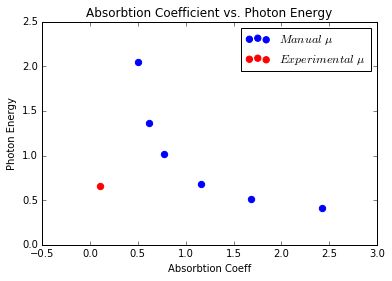

In [178]:
#plt.plot(Absorbtion_Coeff,Photon_Energy,'.b--', linewidth = '.5')
plt.scatter(Absorbtion_Coeff,Photon_Energy,color = 'b',marker = 'o',label = "$Manual \ \mu$", s = 40)
plt.scatter(slope,.662,color = 'r',marker = 'o',label = "$Experimental \ \mu$",s = 40,zorder=3)

plt.xlabel('Absorbtion Coeff')

plt.ylabel('Photon Energy')

plt.title("Absorbtion Coefficient vs. Photon Energy")

plt.legend()

plt.savefig("Absorbtion_CoeffvsPhoton_Energy.pdf")

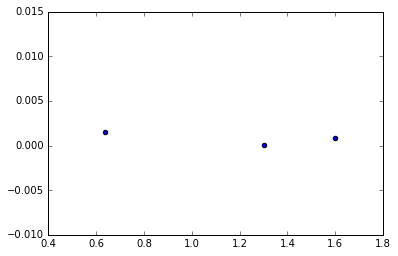

In [7]:
Tau = array([1.50E-3,8.66E-4,4.04E-6])
V_o = array([6.36E-1,1.60,1.30])

plt.scatter(V_o,Tau)

In [182]:
m = array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

f_m = array([0,0,0,1,6,13,15,11,19,12,7,4,4,5,2])

p_m = array([0,0.00328, 0.01275, 0.03301, 0.06412, 0.09965, 0.12904, 0.14323,
              0.13912, 0.12010, 0.09332, 0.06592, 0.04268, 0.02551, 0.01416])

upper_error = array([0,0,0,3,1,2.5,2.5,4,4,1,2.5,3,1,3,1])
lower_error = array([0,0,0,.5,1,3,4,4,5.5,1.5,3,2,1,3,1])
asymmetric_error = [lower_error, upper_error]

yerr = array([0,0,0,2.79,2.79,2.79,2.79,2.79,2.79,2.79,2.79,2.79,2.79,2.79,2.79])

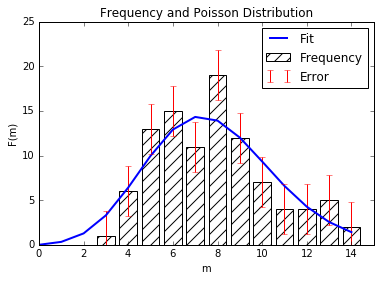

In [183]:
xlim(0,15)
ylim(0,25)
plt.bar(m, f_m, align = 'center',fill=False, hatch = '//', label = "Frequency", zorder=1)
plot(m, 100*p_m , color ='b', linewidth = 2, label = "Fit", zorder=2)
plt.errorbar(m, f_m,yerr, ecolor = "r",fmt='none', label = "Error", zorder=2)

plt.xlabel('m')

plt.ylabel('F(m)')

plt.legend()

plt.title("Frequency and Poisson Distribution")


plt.savefig("Frequencyvsm.pdf")

## m = array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

f_m = array([0,0,0,2,6,13,15,11,19,12,7,4,4,5,2])

p_m = array([.00042,.00328,.01275,0.03301, 0.06412, 0.09965, 0.12904, 0.14323,
              0.13912, 0.12010, 0.09332, 0.06592, 0.04268, 0.02551, 0.01416])

f_exp = array([0,0,0,0,0,0,0,0,0,0,100,0,0,0,0])

f_both = array([[3,2],[4,6],[5,13],[6,15],[7,11],[8,19],[9,12],[10,7],[11,4]
              ,[12,4],[13,5],[14,2]])

lam = 7.77

x = chisquare(p_m,ddof = 13)
print x


In [11]:
0.5645631042978374*13

7.3393203558718865

In [12]:
power_divergence(p_m)

Power_divergenceResult(statistic=0.5645631042978374, pvalue=0.99999997785421568)

In [13]:
x = array([10, 10,  7,  6,  9,  4,  6,  8, 10, 14,  9,  6,  6,  6,  6,  6,  6,  6,  8, 11,  6,  7, 13,  8,  6,
            7,  8,  5, 13,  9,  3,  7, 10,  9, 12,  8,  9,  8,  4, 13,  5, 10,  5,  5,  5,  9,  7,  8,  4,  7,
            4,  8,  5, 12, 13,  5,  6,  7,  8,  9,  9,  6,  7, 10,  8, 11, 11,  8,  5,  5, 11,  4, 14, 12, 13,
            8,  8,  5,  8,  9,  8,  6,  5,  8,  9,  9,  5,  5,  7,  7,  9, 10,  8,  3,  6,  8, 12,  7,  8,  4])

m = array([3,4,5,6,7,8,9,10,11,12,13,14])

f_m = array([2,6,13,15,11,19,12,7,4,4,5,2])

p_m = array([0.03301, 0.06412, 0.09965, 0.12904, 0.14323,
              0.13912, 0.12010, 0.09332, 0.06592, 0.04268, 0.02551, 0.01416])

lam = 7.77

x = chisquare(p_m,ddof = 10)
print x


Power_divergenceResult(statistic=0.28973556389581995, pvalue=0.59039003697382075)


In [14]:
f = array([8,7,13,17,15,7,13,6,9,5])

xp_m = array([7.5,8.6,12.3,14.6,14.9,13.3,10.5,7.5,4.9,5.3])

p = array([.075,.086,.123,.146,.149,.133,.105,.075,.049,.053])

lam = mean(x)
print lam

0.440062800435


In [30]:
Amplitude = array([0, 96, 136, 224, 288, 392, 464, 576, 664, 792, 928, 1040, 1160, 1460])

GM_Volt = array([620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880])


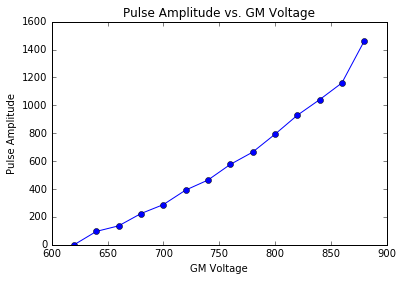

In [32]:
plot(GM_Volt,Amplitude,'ob-')

plt.xlabel('GM Voltage')

plt.ylabel('Pulse Amplitude')

plt.title("Pulse Amplitude vs. GM Voltage")

plt.savefig("Pulse_amplitudevsGM_voltage.pdf")

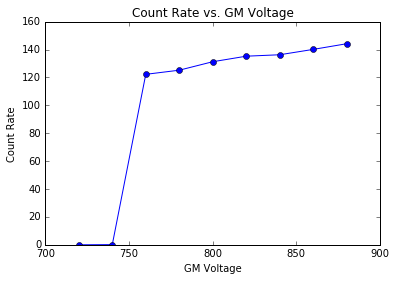

In [184]:
Count_Rate = array([0,.133,122.2, 125.167, 131.233, 135.2, 136.233, 140.067, 144.133])

GM_Volt = array([720,740,760, 780, 800, 820, 840, 860, 880])


plot(GM_Volt,Count_Rate,'ob-')
#plot(GM_Volt[17:],Count_Rate[17:],'ob-')
#plot(GM_Volt[:17],Count_Rate[:17],'ob-')

#plt.yscale("linear")

plt.xlabel('GM Voltage')

plt.ylabel('Count Rate')

plt.title("Count Rate vs. GM Voltage")

xlim(700,900)
ylim(0,160)

plt.savefig("count_ratevsGM_voltage.pdf")

In [ ]:
25-7